# 부스팅(Boosting)
- 기본적으로는 랜덤 포레스트와 유사하다.
- 다른 점은 각 트리들이 던지는 답의 오차들을 보정하여 성능을 끌어 올린다.
- 너어어어어어어어어어어무 느려요~ㅠㅠ

- xgboost 설치
- pip install xgboost

- lightgbm 설치
- pip install lightgbm


In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# 시간 측정을 위한 시간 모듈
import datetime

# 분류 classification

### 학습을 위한 사전 작업

In [2]:
# 데이터 불러오기
df1 = pd.read_csv("data/breast_cancer.csv")

# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

# 인코딩
encoder1 = LabelEncoder()
encoder1.fit(y)
y = encoder1.transform(y)

# 입력 데이터에 대한 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)

display(X)
display(y)

array([[ 1.0716471 , -2.11021126,  1.24691885, ...,  2.21627442,
         2.57629265,  1.89296305],
       [ 1.80872514, -0.29975355,  1.665741  , ...,  1.02843583,
        -0.29491256,  0.27048275],
       [ 1.55731868,  0.55280299,  1.54548514, ...,  1.88116631,
         1.04374227,  0.19229093],
       ...,
       [ 1.52874976,  1.47150615,  1.4501098 , ...,  0.43900458,
        -1.00379467, -1.25588676],
       [-0.63963097,  2.26281581, -0.66183197, ..., -0.68959168,
        -0.76491536, -0.11396037],
       [ 0.0831626 , -1.22825622,  0.04684827, ..., -0.15491471,
        -0.51828023, -0.32247189]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [3]:
model1 = AdaBoostClassifier()

# 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
r1 = cross_val_score(model1, X, y, scoring='f1', cv=kfold)
print(f'평균 정확도 : {r1.mean()}')


평균 정확도 : 0.9493921221111193


In [4]:
model1 = GradientBoostingClassifier()

# 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
r1 = cross_val_score(model1, X, y, scoring='f1', cv=kfold)
print(f'평균 정확도 : {r1.mean()}')


평균 정확도 : 0.9475820989226319


In [5]:
model1 = LGBMClassifier()

# 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
r1 = cross_val_score(model1, X, y, scoring='f1', cv=kfold)
print(f'평균 정확도 : {r1.mean()}')


평균 정확도 : 0.9494792940527012


In [6]:
model1 = XGBClassifier(silent=True, verbosity=0)

# 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
r1 = cross_val_score(model1, X, y, scoring='f1', cv=kfold)
print(f'평균 정확도 : {r1.mean()}')


평균 정확도 : 0.9522813855211677


### 모델 하이퍼 파라미터 튜닝
- learning rate : 학습률. 보정할 때 어느 정도로 보정할 것인지를 설정한다. 값이 너무 크면 보정 정도가 크므로 세밀하지 못하고 속도가 빠르지만, 값이 너무 작으면 세밀하게 보정을 하는 대신에 속도가 느리다.

In [7]:
# AdaBoost
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    "n_estimators": [50, 100, 150, 200, 250, 300],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model1 = AdaBoostClassifier()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring='f1', cv=kfold)

start = datetime.datetime.now()

grid_clf1.fit(X, y)

end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf1.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf1.best_score_}')
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'learning_rate': 1, 'n_estimators': 300}
최적의 모델 평균 성능 : 0.962946361239335
총 튜닝 시간 : 0:03:56.418385


In [8]:
# GradientBoosting
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    "n_estimators": [50, 100, 150, 200, 250, 300],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model2 = GradientBoostingClassifier()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf2 = GridSearchCV(model2, param_grid=params, scoring='f1', cv=kfold)

start = datetime.datetime.now()

grid_clf2.fit(X, y)

end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf2.best_score_}')
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'learning_rate': 1, 'n_estimators': 300}
최적의 모델 평균 성능 : 0.9539201605523913
총 튜닝 시간 : 0:05:52.996898


In [11]:
# Light GBM
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    # 'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model3 = LGBMClassifier()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf3 = GridSearchCV(model3, param_grid=params, scoring='f1', cv=kfold)

start = datetime.datetime.now()

grid_clf3.fit(X, y)

end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf3.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf3.best_score_}')
print(f'총 튜닝 시간 : {end - start}')


최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 100}
최적의 모델 평균 성능 : 0.9494792940527012
총 튜닝 시간 : 0:00:59.198973


In [12]:
# XGBoost
# booster : 내부에 사용할 알고리즘
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'booster' : ["gbtree", "gblinear"],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    "n_estimators": [50, 100, 150, 200, 250, 300],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model4 = XGBClassifier(silent=True, verbosity=0 )
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf4 = GridSearchCV(model4, param_grid=params, scoring='f1', cv=kfold)

start = datetime.datetime.now()

grid_clf4.fit(X, y)

end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf4.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf4.best_score_}')
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'booster': 'gblinear', 'learning_rate': 0.01, 'n_estimators': 250}
최적의 모델 평균 성능 : 0.968045891911621
총 튜닝 시간 : 0:02:28.045840


### 최적의 모델을 학습 데이터로 검증해 본다.

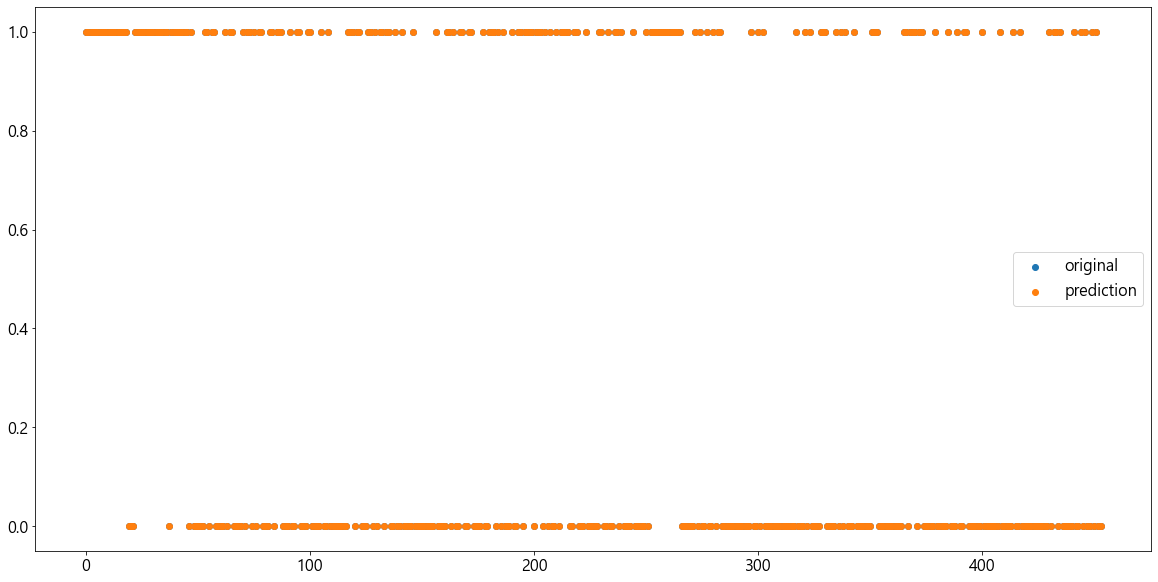

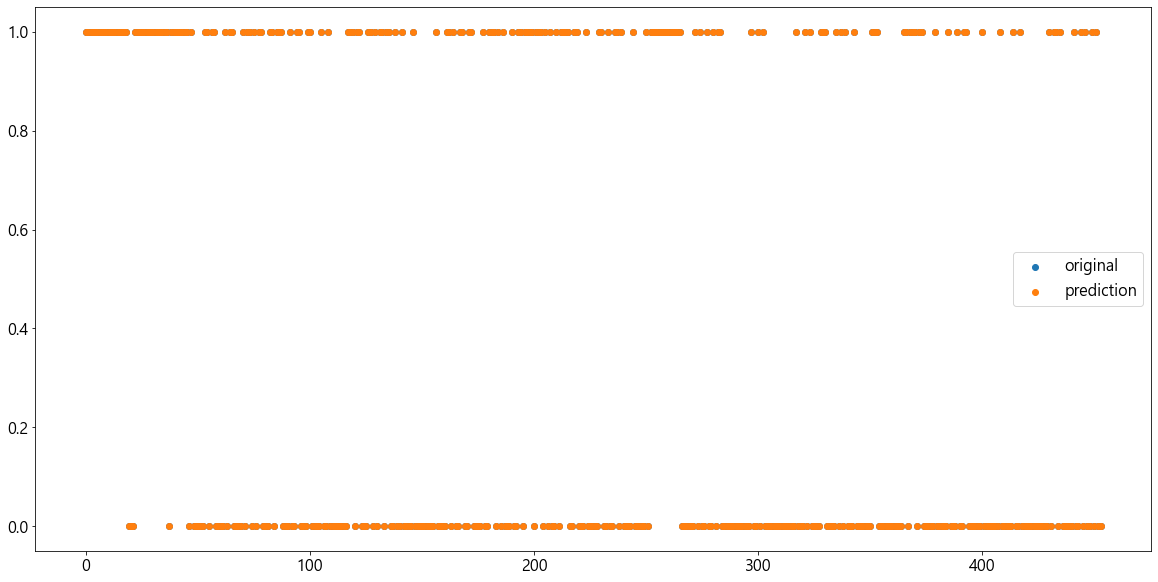

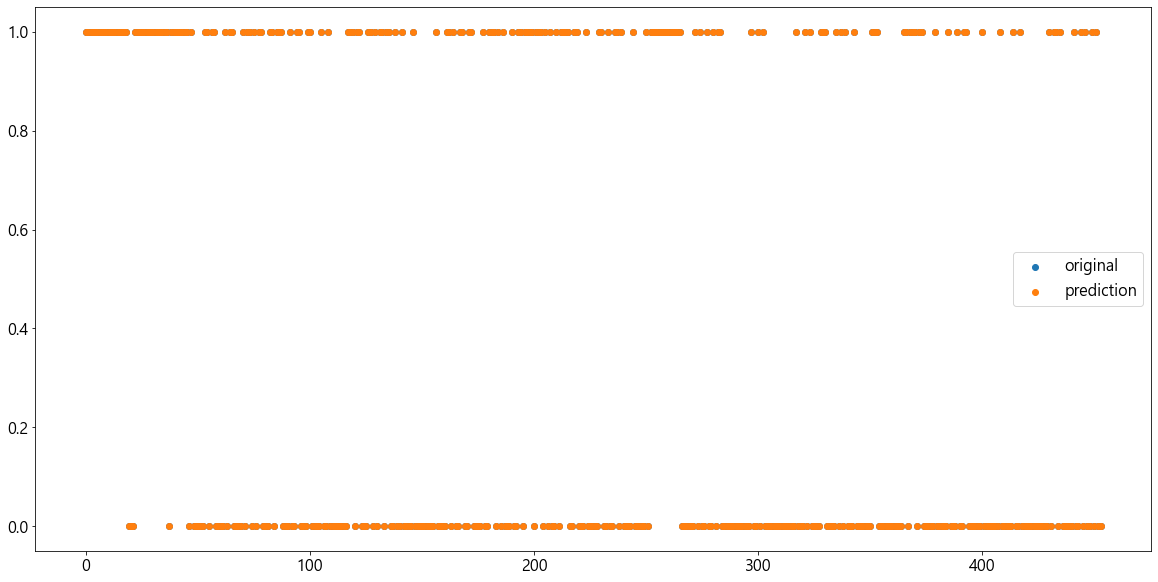

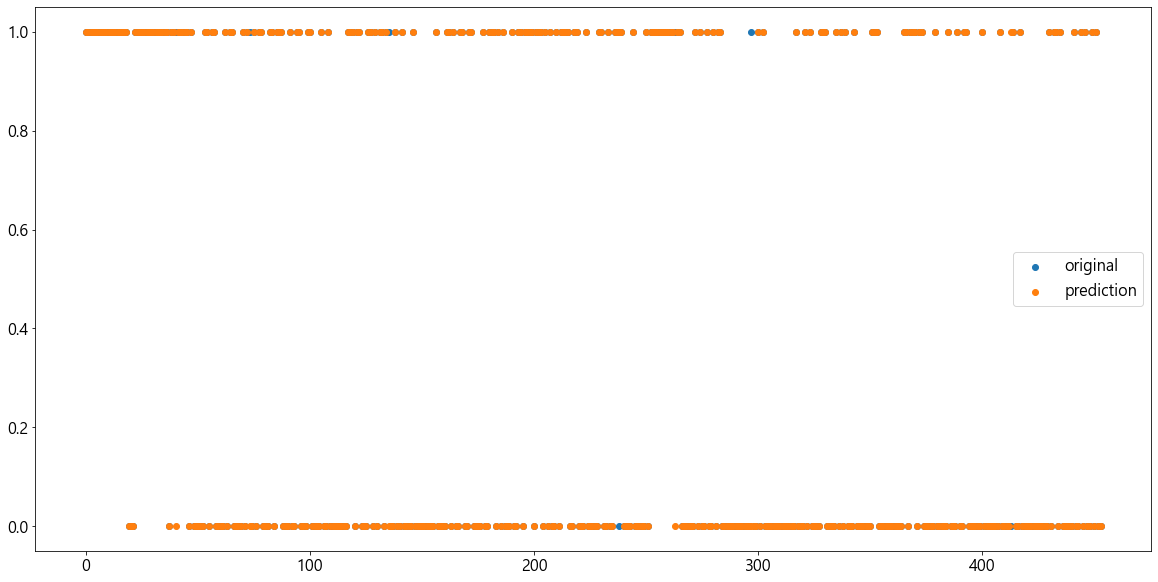

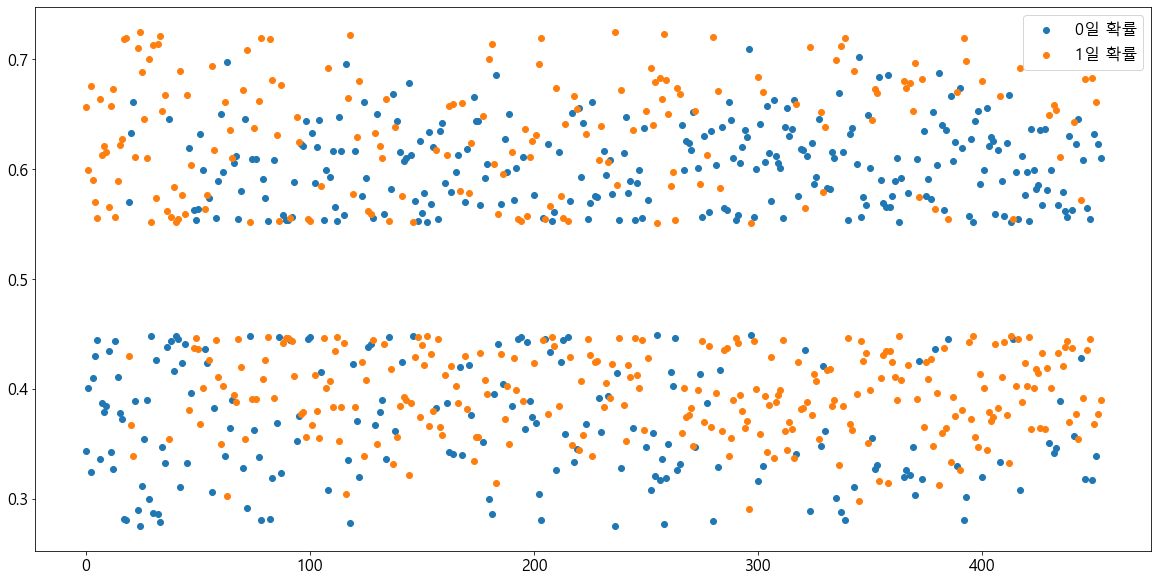

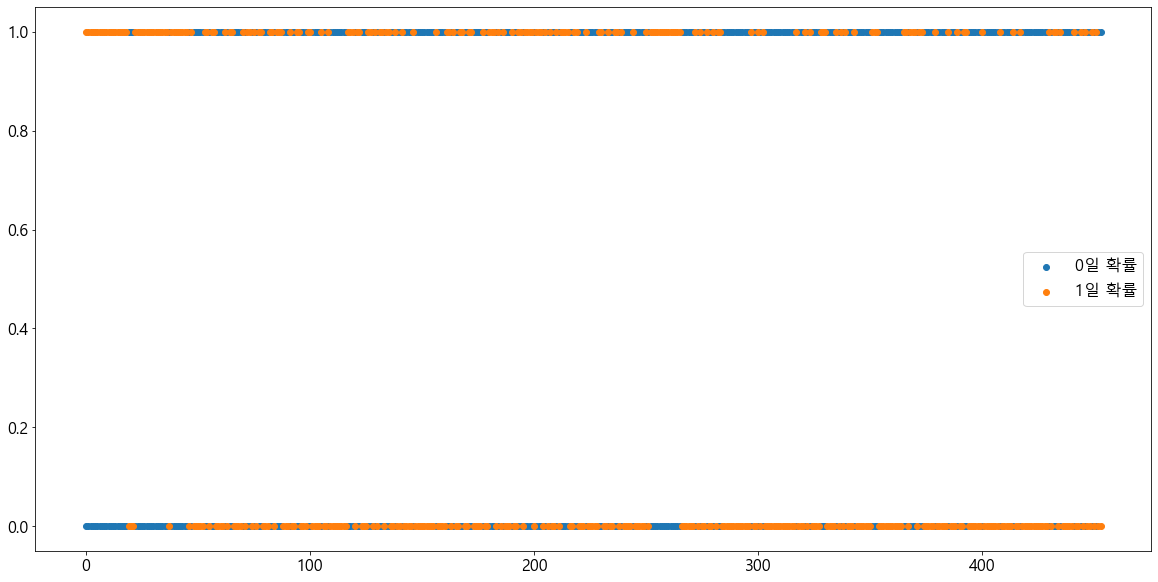

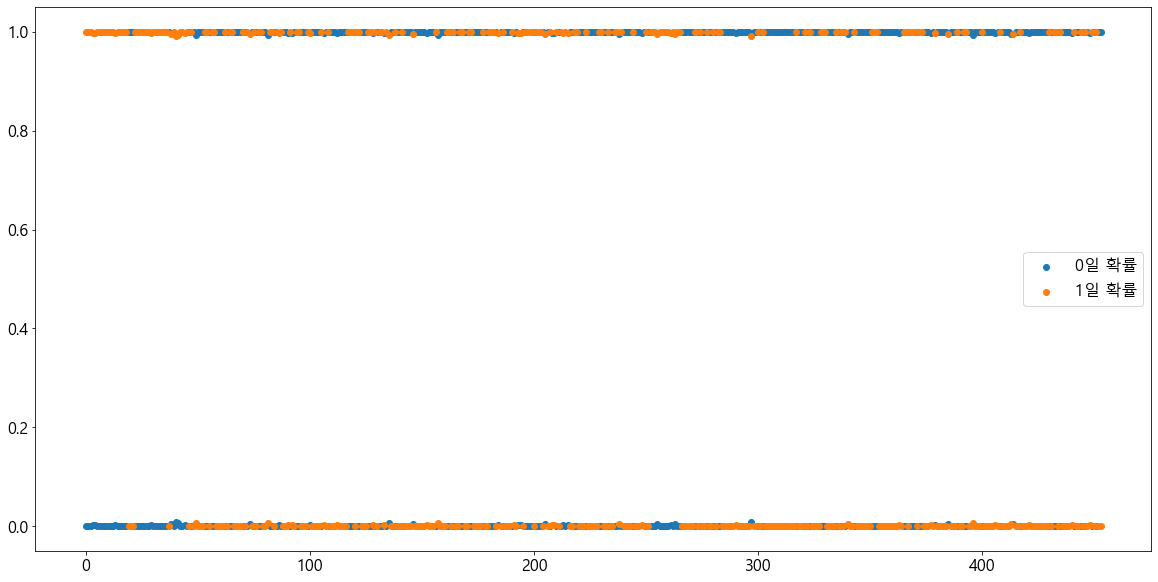

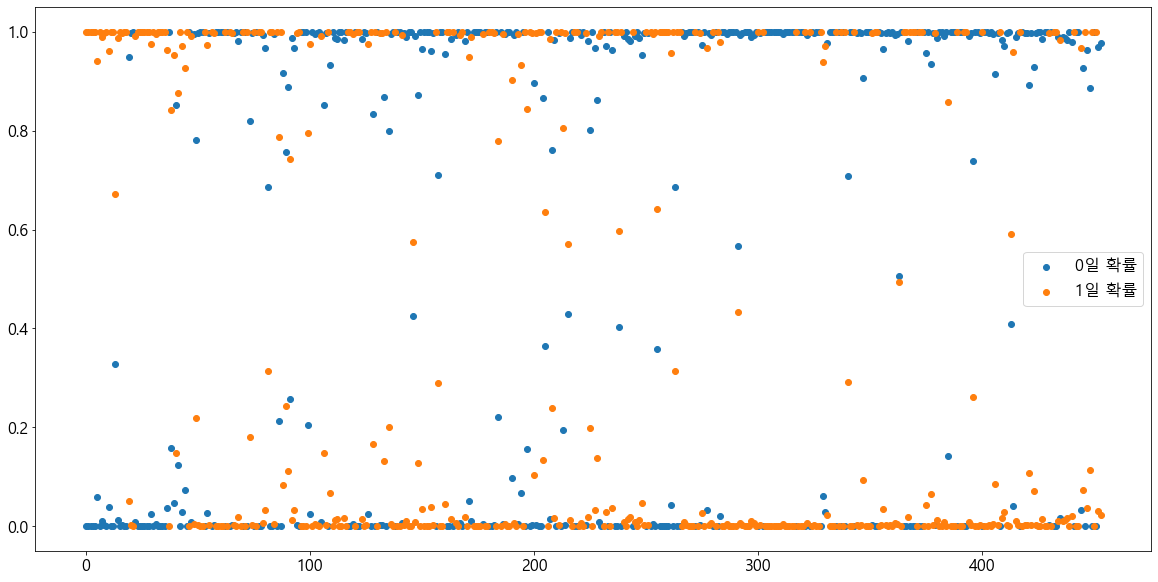

In [15]:
# 최적의 하이퍼파라미터가 셋팅된 모델을 받아온다.
best_model1 = grid_clf1.best_estimator_
best_model2 = grid_clf2.best_estimator_
best_model3 = grid_clf3.best_estimator_
best_model4 = grid_clf4.best_estimator_


# 학습
best_model1.fit(X, y)
best_model2.fit(X, y)
best_model3.fit(X, y)
best_model4.fit(X, y)


# 예측결과를 시각화 해본다.
y_pred1 = best_model1.predict(X)
y_pred2 = best_model2.predict(X)
y_pred3 = best_model3.predict(X)
y_pred4 = best_model4.predict(X)


plt.scatter(list(range(len(y))), y, label='original')
plt.scatter(list(range(len(y_pred1))), y_pred1, label='prediction')
plt.legend()
plt.show()

plt.scatter(list(range(len(y))), y, label='original')
plt.scatter(list(range(len(y_pred2))), y_pred2, label='prediction')
plt.legend()
plt.show()

plt.scatter(list(range(len(y))), y, label='original')
plt.scatter(list(range(len(y_pred3))), y_pred3, label='prediction')
plt.legend()
plt.show()

plt.scatter(list(range(len(y))), y, label='original')
plt.scatter(list(range(len(y_pred4))), y_pred4, label='prediction')
plt.legend()
plt.show()

# 결과 확률
proba_a1 = best_model1.predict_proba(X)
proba_a2 = best_model2.predict_proba(X)
proba_a3 = best_model3.predict_proba(X)
proba_a4 = best_model4.predict_proba(X)


# 0일 확률들
a10 = proba_a1[:, 0]
# 1일 확률들
a11 = proba_a1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.legend()
plt.show()

# 0일 확률들
a10 = proba_a2[:, 0]
# 1일 확률들
a11 = proba_a2[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.legend()
plt.show()

# 0일 확률들
a10 = proba_a3[:, 0]
# 1일 확률들
a11 = proba_a3[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.legend()
plt.show()

# 0일 확률들
a10 = proba_a4[:, 0]
# 1일 확률들
a11 = proba_a4[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.legend()
plt.show()

### 새로운 데이터를 예측한다.

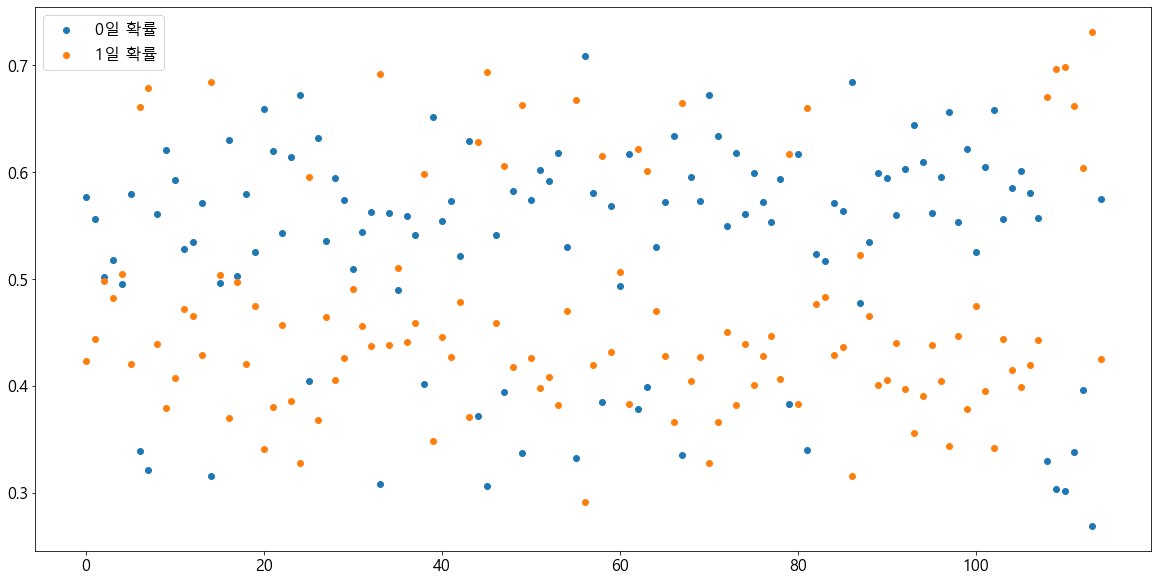

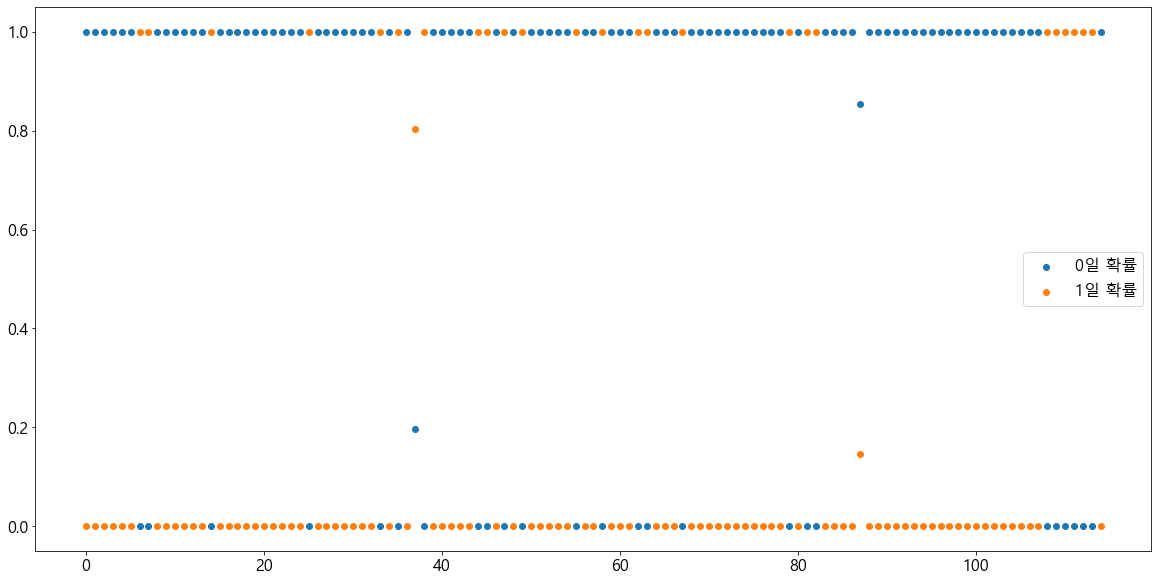

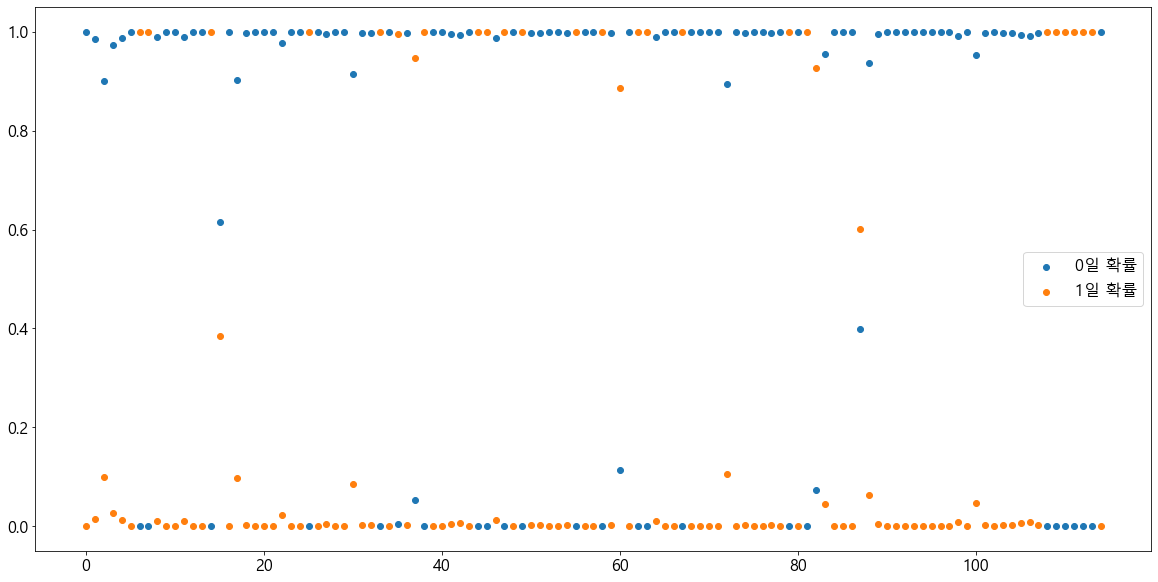

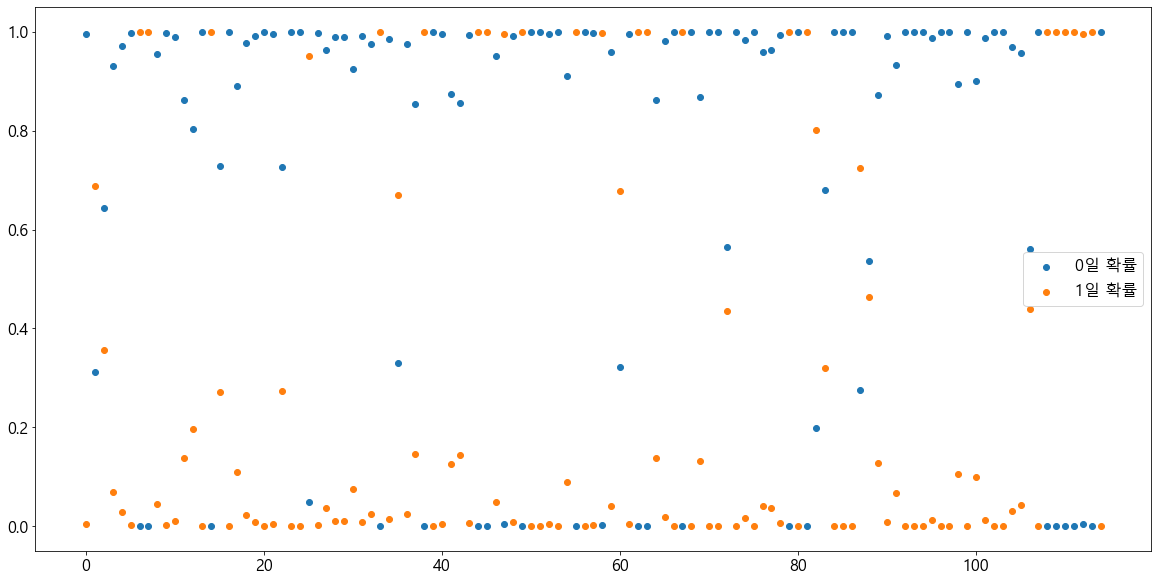

저장완료


In [16]:
df2 = pd.read_csv('data/breast_cancer_new.csv')

# 데이터 표준화
scaled_data = scaler1.transform(df2)

# 결과를 예측한다.
y_pred1 = best_model1.predict(scaled_data)
y_pred2 = best_model2.predict(scaled_data)
y_pred3 = best_model3.predict(scaled_data)
y_pred4 = best_model4.predict(scaled_data)


# 예측 확률을 시각화한다.
proba_data = best_model1.predict_proba(scaled_data)

# 0일확률과 1일 확률 값을 각각 가져온다.
a10 = proba_data[:, 0]
a11 = proba_data[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.legend()
plt.show()

# 예측 확률을 시각화한다.
proba_data = best_model2.predict_proba(scaled_data)

# 0일확률과 1일 확률 값을 각각 가져온다.
a10 = proba_data[:, 0]
a11 = proba_data[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.legend()
plt.show()

# 예측 확률을 시각화한다.
proba_data = best_model3.predict_proba(scaled_data)

# 0일확률과 1일 확률 값을 각각 가져온다.
a10 = proba_data[:, 0]
a11 = proba_data[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.legend()
plt.show()


# 예측 확률을 시각화한다.
proba_data = best_model4.predict_proba(scaled_data)

# 0일확률과 1일 확률 값을 각각 가져온다.
a10 = proba_data[:, 0]
a11 = proba_data[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.legend()
plt.show()


# 결과 데이터를 복원한다.
result_data1 = encoder1.inverse_transform(y_pred1)
result_data2 = encoder1.inverse_transform(y_pred2)
result_data3 = encoder1.inverse_transform(y_pred3)
result_data4 = encoder1.inverse_transform(y_pred4)


# 결과를 저장한다.
df2['target'] = result_data1
df2.to_csv('data/breast_cancer_AdaBoost.csv')

df2['target'] = result_data2
df2.to_csv('data/breast_cancer_GradianBoost.csv')

df2['target'] = result_data3
df2.to_csv('data/breast_cancer_LightGBM.csv')

df2['target'] = result_data4
df2.to_csv('data/breast_cancer_XGBoost.csv')

print('저장완료')